ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32
ic| nums.dtype: dtype('float64')
ic| x.dtype: torch.float32


KeyboardInterrupt: 

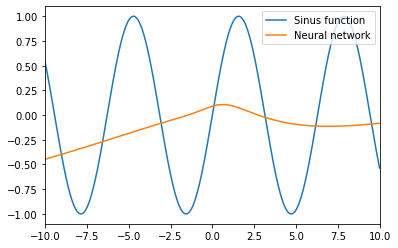

In [12]:

import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
from icecream import ic

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.input = nn.Linear(1,256)
        self.hidden_1 = nn.Linear(256,256)
        self.hidden_2 = nn.Linear(256,256)
        self.out = nn.Linear(256,1)
    
    def forward(self,x):
        x = self.input(x)
        x = F.elu(x)
        x = self.hidden_1(x)
        x = F.elu(x)
        x = self.hidden_2(x)
        x = F.elu(x)
        x = self.out(x)
        return x


def train_network(epochs):
    network = NeuralNetwork()
    optimizer = torch.optim.Adam(network.parameters(), lr = 3e-4)
    loss_fn = torch.nn.MSELoss()
    batch_size = 128
    losses = list()
    for epoch in range(epochs):
        if epoch%500 == 0 and epoch != 0:
            print('Epoch: '+ str(epoch))
            print('Last error: ' + str(losses[-1]))


        #save images
        inputs = np.arange(-10,10,0.01)
        true_sin = np.sin(inputs)
        with torch.no_grad():
            net_sin = network(torch.Tensor(inputs).view(-1,1)).squeeze().numpy()
        plt.plot(inputs,true_sin, label = 'Sinus function')
        plt.plot(inputs,net_sin, label = 'Neural network')
        plt.legend(loc = 1)
        plt.xlim(-10,10)
        plt.savefig('Plots/'+str(epoch)+'.png')
        plt.clf()


        #create training numbers
        nums = np.random.uniform(-10,10,batch_size)
        ic(nums.dtype)
        x = torch.Tensor(nums)
        ic(x.dtype)
        y = torch.Tensor(np.sin(nums))
        y = y.view(batch_size,-1)

        #train network
        optimizer.zero_grad()
        net_output = network(x.view(batch_size,-1))
        loss = loss_fn(y,net_output)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    plt.plot(range(len(losses)), losses)
    plt.show()
    torch.save(network.state_dict(),'trained_network.pt')

    # #resulting function
    # inputs = np.arange(-10,10,0.01)
    # true_sin = np.sin(inputs)
    # with torch.no_grad():
    #     net_sin = network(torch.Tensor(inputs).view(-1,1)).squeeze().numpy()
    # plt.plot(inputs,true_sin, label = 'Sine function')
    # plt.plot(inputs,net_sin, label = 'Neural network')
    # plt.legend(loc = 1)
    # plt.xlim(-10,10)
    # plt.show()
    
def create_gif(folder):
    with imageio.get_writer('sinusgif.gif', mode = 'I', duration = 1/60) as writer:
        for filename in sorted(os.listdir(folder), key = len)[:1500]:
            image = imageio.imread(folder+filename)
            writer.append_data(image)


def plot_larger(range,network_path):
    network = NeuralNetwork()
    network.load_state_dict(torch.load(network_path))
    network.eval()

    inputs = np.arange(-range,range,0.01)
    true_sin = np.sin(inputs)
    with torch.no_grad():
        net_sin = network(torch.Tensor(inputs).view(-1,1)).squeeze().numpy()
    plt.plot(inputs,true_sin, label = 'Sinus function')
    plt.plot(inputs,net_sin, label = 'Neural network')
    plt.legend(loc = 1)
    plt.xlim(-range,range)
    plt.savefig('Plots/larger_plot.png')
    plt.show()



train_network(500)
# create_gif('Plots/')
#plot_larger(100,'trained_network.pt')

        

![SegmentLocal](sinusgif "segment")